# SPRING 2021
# Applied Machine Learning, HW 7

*Instructions:* Read all problems very carefully. Make sure that you are answering all questions included in a given problem. For every question, you are provided with a code cell to show your solution; be sure to run the cell by pressing the SHIFT and ENTER buttons simultaneously. The output of the cell must demonstrate the correctness of your solution. If you need to insert more code cells -- feel free to do so.

**Problem 1** 

1. Mount your Google Drive to Google Colab.


In [1]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


2. Open the /Data/HW_7 directory located inside our shared Google Drive folder; you should find there a csv-file called 'df_1.csv'. Download this file to your local hard drive and then upload the downloaded file to some folder on your Google Drive. Create a new `Path` object using the `pathlib` library pointing to this folder. For example, for me, the path looks like this: 

  `'/content/gdrive/My Drive/Colab Notebooks/Applied_Machine_Learning/Data/HW_7'`

  But yours might be different. Use the name `PATH` for this object.

  Now, load the data from your copy of the 'df_1.csv' file into a new Pandas data frame called `df_1` using the standard [Pandas data loading function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html). 

In [2]:
from pathlib import Path
import pandas as pd

PATH = Path('/content/gdrive/My Drive/Colab Notebooks/HW_7')
df_1 = pd.read_csv(PATH/'df_1.csv') 

4. Now, let's do some basic data exploration. Begin by checking the shape of the data frame.

In [3]:
df_1.shape

(400, 2)

 5. Demonstrate that the columns names are `x_values` and `y_values`.

In [4]:
df_1.columns

Index(['x_values', 'y_values'], dtype='object')

6. Convert each column of the data frame into a one dimensional NumPy array (*hint:* use the `values` attribute). Then count the number of missing values in each of the arrays.

In [5]:
import numpy as np

x_vals = df_1.loc[:,'x_values']
y_vals = df_1.loc[:,'y_values']
x_vals_array = x_vals.values
y_vals_array = y_vals.values

mask_x = np.isnan(x_vals_array)
mask_y = np.isnan(y_vals_array)

print(np.count_nonzero(mask_x))
print(np.count_nonzero(mask_y))

0
39


7. Pandas library has a [special function for removing missing values](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html). Click on the provided link to read the description of this function and check out some usage examples (scroll to the very bottom of the page). Use this function to remove all observations with missing values (either re-assign `df_1` to the clean version of the data frame or set `inplace=True` without re-assignment).

In [6]:
df_1.columns
df_1 = df_1.dropna()


8. Demonstrate that now `df_1` does not contain any missing values.

In [7]:
df_1.isna()

,x_values,y_values
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
394,False,False
395,False,False
397,False,False
398,False,False


9. Determine the smallest and the largest values present in each of the columns of the data frame. To do that you can simply apply the standard NumPy universal functions `min()` and `max()` to each of the columns (there is no need to convert the columns to NumPy arrays). Show only 3 decimals.

In [8]:
# x values
print(df_1.loc[:,'x_values'].max())
print(df_1.loc[:,'x_values'].min())

# y values
print(df_1.loc[:,'y_values'].max())
print(df_1.loc[:,'y_values'].min())

700.0
-700.0
11.493890975160065
-31.901959380361408


10. Count the number of negative (strictly smaller than zero) values in the `'x_values'` column (use the Boolean mask approach).

In [9]:
x_vals = df_1.loc[:,'x_values']
x_vals_array = x_vals.values
x_mask = x_vals_array < 0
print(np.count_nonzero(x_mask))

180


11. Select all rows of the data frame that contain only positive (strictly larger than zero) `'y_values'` entries (again, use the Boolean mask approach). Save the result as a new data frame called `df_1_y_pos`. Then determine the mean value of the `'x_values'` column in this new data frame (again, you can simply apply the standard NumPy universal function `mean()` to this column).

In [10]:
df_1_y_pos = df_1['y_values'] > 0
new_df = df_1[df_1_y_pos]
np.mean(new_df['x_values'])
new_df['x_values'].shape

(61,)

12. In what follows, you must treat the `x_values` data as features and the `y_values` data as labels. Convert the column data into NumPy arrays and create a random split of these data into a training set `X_train, y_train` and a testing set `X_test, y_test` using the [standard scikit-learn function](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with `radnom_state=42`; place 35% of the data into the test set and the remaining part into the training set (review our lecture notes on validating machine learning models before attempting this problem). Then reshape `X_train` and `X_test` to turn them into two-dimensional arrays. 

In [11]:
from sklearn.model_selection import train_test_split

x_vals = new_df['x_values']
x_vals_array = x_vals.values
y_vals = new_df['y_values']
y_vals_array = y_vals.values

x_train, x_test,y_train, y_test = train_test_split(x_vals_array,y_vals_array, test_size=.35, random_state=42 )
x_test = x_test.reshape((x_test.size,1))
x_train = x_train.reshape((x_train.size,1))

x_train.shape



(39, 1)

13. Build two scikit-learn pipelines called `pipe_lr` and `pipe_ridge`; the first two steps of these pipelines must do the following:  
  * Create new polynomial features of up to 30th degree (do not include the feature of degree zero).
  * Scale the data using the Min-Max scaler. 

  The last step of `pipe_lr` must perform `LinearRegression()` and the last step of `pipe_ridge` must perform a Ridge regression with $\alpha=0.5$. Give some well-matching names to the steps of the pipelines. Each of these pipelines represents a separate *model* that you will be using to fit the data.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

pipe_lr = Pipeline([
                    ('poly', PolynomialFeatures(degree=30, include_bias=False)),
                    ('sc', MinMaxScaler()),
                    ('lr', LinearRegression())
])

pipe_ridge = Pipeline([
                       ('poly', PolynomialFeatures(degree=30, include_bias=False)),
                       ('sc', MinMaxScaler()),
                        ('rr', Ridge(alpha=.5))

])

14. For both of these models, compute the $R^2$ scores for each of the 5 cross-validation folds of the training set using the scikit-learn `cross_val_score()` function (see an example in the lecture notes). Save the resulting arrays of scores as `r2_lr` and `r2_ridge` and print them to the screen.

In [13]:
from sklearn.model_selection import cross_val_score


r2_lr = cross_val_score(pipe_lr, x_train, y_train, cv= 5, scoring= 'neg_root_mean_squared_error')
r2_ridge = cross_val_score(pipe_ridge,x_train,y_train, cv=5, scoring='neg_root_mean_squared_error')

print(r2_lr)
print(r2_ridge)

[-7.64442810e+12 -3.54560347e+07 -2.97678714e+04 -2.90442255e+02
 -1.06020970e+15]
[-1.43608601 -2.73546341 -1.99086615 -2.80015679 -1.62561152]


15. Using the results obtained in the previous step, compute the average $R^2$ scores for each of the models and print them to the screen (show only 3 decimals). Which of these models is doing a better job in fitting the data?

In [14]:
avg1 = round(np.mean(r2_lr), 3)
print(avg1)
avg2 = round(np.mean(r2_ridge), 3)
print(avg2)
#the model doing a better is the ridge 

-213570833183202.75
-2.118


**Problem 2**

1. Use the standard [Pandas csv-files reader](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) to load data from the following url: 

  "https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/df_2.csv". 

  Save the resulting data frame as `df_2`.

In [15]:
import pandas as pd
df_2 = pd.read_csv("https://raw.githubusercontent.com/graf10a/Applied-Machine-Learning-Course/main/Data/df_2.csv")

2. Now, let's do some basic data exploration, similar to the one we did in the previous problem. Begin by checking the shape of the data frame.

In [16]:
df_2.shape

(300, 2)

 3. Demonstrate that the columns names are `x_values` and `y_values`.

In [17]:
df_2.columns

Index(['x_values', 'y_values'], dtype='object')

4. Convert each columns of the data frame into a one dimensional NumPy array (*hint:* use the `values` attribute). Then count the number of missing values in each of the arrays.

In [18]:
xcolumn = df_2.loc[:,'x_values'].values
ycolumn = df_2.loc[:,'y_values'].values

mask_x = np.isnan(xcolumn)
mask_y = np.isnan(ycolumn)

print(np.count_nonzero(mask_x))
print(np.count_nonzero(mask_y))

0
48


5. Use the same approach as in the previous problem to remove the missing values from the data frame.

In [19]:
df_2 = df_2.dropna()

6. Demonstrate that now `df_2` does not contain any missing values.

In [20]:
df_2.isna()

,x_values,y_values
0,False,False
1,False,False
2,False,False
3,False,False
5,False,False
...,...,...
294,False,False
296,False,False
297,False,False
298,False,False


7. The Pandas function that removes the missing values also removes the corresponding implicit indices, so that the new implicit index of the data frame has gaps. For this problem, this is not the behavior we want, so we need to reset the implicit index. This can be done by running the [following command](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html): 

  `df_2.reset_index(drop=True, inplace=True)`

  Run this command to reset the implicit index of `df_2`.

In [21]:
df_2.reset_index(drop=True, inplace=True)

8. Determine the smallest and the largest values present in each of the columns of the data frame (do it in the same way how you did it in the previous problem).

In [22]:
# x values
print(df_2.loc[:,'x_values'].max())
print(df_2.loc[:,'x_values'].min())

# y values
print(df_2.loc[:,'y_values'].max())
print(df_2.loc[:,'y_values'].min())

20.0
-19.732441471571907
3.427576740375365
-4.8354926687463555


9. Print to the screen all elements of the `y_values` column with the implicit index in the range $[67, 74]$ (note that both limits are inclusive). Don't forget to use the `iloc` attribute.

In [23]:
print(df_2.iloc[67:75])

     x_values  y_values
67   2.876254 -0.064559
68  18.394649  2.061626
69  10.234114 -0.879507
70 -10.100334 -0.552109
71   0.200669  0.856761
72   4.080268  0.003662
73  -7.023411 -0.861319
74   7.023411 -0.902649


10. Build a scikit-learn pipeline called `pipe` containing the following steps:  
  * creating new polynomial features: do not include the feature of degree zero and do not specify the `degree` parameter, just leave it at its default value;
  * scaling the data using the standard scaler approach;
  * performing `LinearRegression()`.

In [29]:
from sklearn.preprocessing import StandardScaler
pipe = Pipeline([
                 ('poly', PolynomialFeatures(include_bias=False)),
                 ('sc', StandardScaler()),
                 ('lr', LinearRegression())

])

11. Your next objective is going to be to find the best polynomial degree to fit these mystery data by exploring all polynomial degrees in the range from 1 to 30. You will be using the scikit-learn `GridSearchCV()` class -- please refer to our lecture notes for an example and also get yourself familiar with the [sklearn description page](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for this class. 

  First of all, load this class from the scikit-learn library and create a new instance of this class called `gs`. Use the pipeline you created earlier as your `estimator`; set `param_grid = {'poly__degree': np.arange(1, 31)}`, `cv=5` (5-fold cross-validation), and `scoring='neg_root_mean_squared_error'`.

In [30]:
from sklearn.model_selection import GridSearchCV

gs = GridSearchCV(pipe, param_grid ={'poly__degree': np.arange(1, 31)}, cv=5, scoring= 'neg_root_mean_squared_error' )

12. Fit the `gs` instance on all data of the `df_2` data frame treating `x_values` as your features and `y_values` as your labels (recall, that you can always turn a column of a Pandas data frame into a NumPy array by applying the `values` attribute; also, don't forget to reshape the features). After that print to the screen the best polynomial degree found by the grid search.

In [31]:
x_values  = df_2.loc[:,'x_values'].values 
y_values = df_2.loc[:,'y_values'].values 




x_values = x_values.reshape((x_values.size,1))
gs.fit(x_values,y_values)

GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('poly',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=False,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('sc',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('lr',
                                        LinearRegression(copy_X=True,
                                                         fit_intercept=True,
                                                         n_jobs=None,
                                                  

13. Compute the predicted values `y_pred` (`gs`'s `predict` method will use the best parameter(s) automatically) on the given feature values (the entries of the `x_values` column of `df_2`). After than compute the $\text{RMSE}$ and $R^2$ scores (for an example refer to the lecture notes). Print these scores to the screen (show only 3 decimals).

In [35]:
from sklearn.metrics import mean_squared_error, r2_score



y_pred = gs.predict(x_values)


grid_rmse=mean_squared_error(y_values, y_pred)**0.5
print(f"The RMSE score after grid search CV is {grid_rmse:.3f}")

grid_r2=r2_score(y_values, y_pred)
print(f"The R^2 score after grid search CV is {grid_r2:.3f}")

The RMSE score after grid search CV is 0.718
The R^2 score after grid search CV is 0.694


14. Create two scatter plots on the same set of axes: one showing the original data points in blue and another showing the predicted points in red. I am leaving it up to you how you want to label the plot and what kind of title you would like to use.

  Do your predictions look reasonable? 

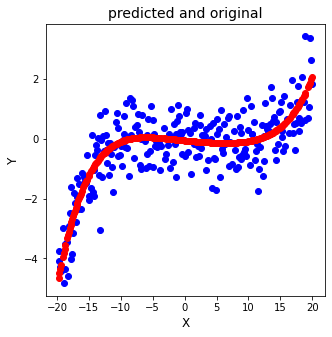

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.plot(x_values,y_values,'bo')
plt.xlabel('X',fontsize=12)
plt.ylabel('Y',fontsize=12)
plt.title('predicted and original',fontsize=14)
plt.plot(x_values,y_pred,'ro')

#The predictions look reasonably accurate 